> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::

# Multi-cúbits




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

ModuleNotFoundError: No module named 'qiskit.tools'

## Estados multi-cúbit

### Bases multi-cúbit

 Sea $\{ \ket{i}\}_{i=0,1}$ la base computacional del espacio de Hilbert de un cúbit $\Hil = {\mathbb C}^2$.
 
::::::{card} 
<b>Definición</b>:  

^^^

La base computacional de $ \Hil^{\otimes n}$ está formada por todas las cadenas  posibles formadas con elementos de la base de $\Hil$


$$
 \ket{i_{n-1}}\otimes \ket{i_{n-2}}\otimes ... \otimes \ket{i_0} ~\equiv ~\ket{i_{n-1} i_{n-2}...i_0}~$$ 

    
donde $~~
 i_{n-1},...,i_0=0,1$
::::::



La *dimensión*  dim($\Hil^{\otimes n}$) = $2^n$ coincide con el número combinaciones distintas posibles: $2\times 2...\times 2 = 2^n$.



- Cuando representa un un ket mediante una columna de componentes, el producto tensorial se traduce en el producto de Kronecker. Por ejemplo, para un sistema de 2-cúbits,   $n=2$ y tendríamos $2^n=2^2 = 4$ y entonces



$$
\ket{00}~=~ \ket{0}\otimes \ket{0}~=~
\begin{bmatrix}1\\ 0\end{bmatrix} \otimes \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}
~~~~~~~~,~~~~~~~
\ket{01}~=~ \ket{0}\otimes \ket{1}~=~
\begin{bmatrix}1\\ 0\end{bmatrix} \otimes \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix}
$$




$$
\ket{10}~=~ \ket{1}\otimes \ket{0}~=~
 \begin{bmatrix}0\\ 1\end{bmatrix} \otimes \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}0\\0\\1 \\ 0\end{bmatrix}
 ~~~~~~~,~~~~~~
\ket{11}~=~ \ket{1}\otimes \ket{1}~=~
\begin{bmatrix}0\\ 1\end{bmatrix} \otimes \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}0\\0\\0 \\ 1\end{bmatrix}
$$




Las etiquetas de los vectores y, por tanto, de las componentes de las matrices, bi-índices $ij=11,12,21,22$  adoptan el mismo número, $N^2$, de configuraciones distintas. 


::::::{admonition} Notar
:class: note

    
- El <i>multi-ínidice</i> $i_{n-1}i_{n-2}....i_0$ puede interpretarse como un número entero, $p$, escrito en base *binaria*, que podemos traducir a base decimal


$$
~~ i_{n-1} i_{n-2}...i_0 ~~~\longleftrightarrow~~~
  p ~=~ 2^{n-1}i_{n-1} + 2^{n-2}i_{n-2} + ...+ 2^1 i_1 + 2^0 i_0  ~=~ \sum_{k=0}^{n-1} 2^k i_k 
$$

que tomará  $2^n$ valores $p = 0,1, \, ...\, ,2^{n}-1$. 

    
- Usamos el convenio de que el número binario menos significativo está a la derecha
    
::::::

 El cambio de notación *multi-índice* $\leftrightarrow$ *entero en notación decimal* será frecuente. 
Por ejemplo $\ket{000} = \ket{0}, \ket{111} = \ket{7}$ etc.

El vector de estado más general  $\ket{u}\in \Hil^{\otimes n}$ será una combinación lineal de elementos de la base computacional $\ket{i_n i_{n-1}...i_1}$ en términos de unas componentes $u_{i_ni_{n-1}...i_1}$   

$$
\ket{u} = \sum_{i_{n-1},...,i_0=0,1} u_{i_{n-1} ... i_0} \ket{i_{n-1}  ... i_0}  = \sum_{p=0}^{2^n-1} u_p \ket{p}, .
$$

donde hemos usado alternativamente la notación binaria y la decimal. 


::::::{admonition} Ejemplo
:class: tip


Para $n=2$ tendremos, en notación binaria  

$$
\begin{array}{ccc}
\ket{u} ~&=& ~ \sum_{i,j=0,1} u_{ij} \ket{ij}~=~ u_{00}\ket{00}+ u_{01}\ket{01} + u_{10}\ket{10} +u_{11}\ket{11}
\\ \\
~&=&~ u_{00}\begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}+ u_{01}  \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix} + u_{10}\begin{bmatrix}0\\0\\1\\0\end{bmatrix}+u_{11}  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}   ~ = \begin{bmatrix}u_{00}\\ u_{01}\\ u_{10} \\ u_{11}  \end{bmatrix}
\end{array}
$$
    
y en notación decimal, para el mismo vector

$$
\begin{array}{ccc}
\ket{u} ~&=& ~ \sum_{k=0}^{2^2-1=3} u_{k} \ket{k}~=~ u_{0}\ket{0}+ u_{1}\ket{1} + u_{2}\ket{2} +u_{3}\ket{3}
\\ \\
~&=&~ u_{0}\begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}+ u_{1}  \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix} + u_{2}\begin{bmatrix}0\\0\\1\\0\end{bmatrix}+u_{3}  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}   ~ = \begin{bmatrix}u_{0}\\ u_{1}\\ u_{2} \\ u_{3}  \end{bmatrix}
\end{array}
$$
No debería haber confusión entre ambas notaciones puesto que, en cuanto aparezca un número superior a 1 quiere decir que estamos tratando con la base decimal. 
::::::




  
::::::{admonition} Ejercicio
:class: tip

Normaliza el vector $\ket{u} = (1+i)\ket{101} -2\ket{010} + 3\ket{111}$ y escríbelo en notación decimal
::::::


### Circuitos multi-cúbit

Sea  un estado multicúbit de la base computacional $q_{a} = 0,1$

$$
\ket{q_{n-1}q_{n-2}...q_0} ~=~ \ket{q_{n-1}}\otimes \ket{q_{n-2}}\otimes ... \otimes \ket{q_0}
$$

Este estado 
se propaga a lo largo de un circuito de forma que <i>cada línea representa un espacio de Hilbert</i>.

La asignación que se hace en *Qibo* y en *Qiskit* coloca el cúbit de índice binario *menos relevante* $q_0$  en la  línea superior. Esto es

- Qiskit:  


::::{figure} images/multicubit_circ.png
:width: 200px
:align: center
::::


- Todos los demás

::::{figure} images/Multicubit_circ_NC.png
:width: 200px
:align: center
::::


### Entrelazamiento

De forma  general, los estados $\ket{u}\in \Hil^{\otimes n}$ pueden ser de dos clases:
    
    
   - *estado factorizables*, cuando $\ket{u} = \ket{a}\otimes \ket{b}\otimes...\otimes \ket{c}$


   - *estados entrelazados*, cuando $\ket{u} \neq \ket{a}\otimes \ket{b}\otimes...\otimes \ket{c}$ no es factorizable
    
    
Ahora podemos usar también *bases* cuyo elementos sean vectores factorizados o entrelazados. 

- *base computacional* (factorizada): $\{ \ket{00},\ket{01},\ket{10},\ket{11}\}$


- *base de Bell* (entrelazada): 

$$
\begin{array}{rcl}
\ket{00}_B &=& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) \\
\ket{01}_B &=& \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) \\
\ket{10}_B &=& \frac{1}{\sqrt{2}} \big( \ket{01} + \ket{10} \big) \\
\ket{11}_B &=& \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{10} \big) \\
\end{array}
$$

  

### Medidas parciales

Una medida parcial afecta sólamente a un subconjunto de cúbits de un multi-cúbit. 
Aquí encontramos una diferencia crucial entre estados factorizables y entrelazados. 
Consideremos el estado bi-cúbit *factorizable* visto antes

$$
\ket{u} = \ket{a}\otimes \ket{b} = \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\, .
$$

donde vamos a suponer que el cúbit $\ket{a}$ está en el laboratorio de Alice, y el $\ket{b}$ en el de Bob.
Una medida de Alice sobre el primer cúbit solo podrá resultar, con probabilidad $1/2$, en uno de los dos posibles estados siguientes  

$$
\ket{u} ~\rightarrow ~ \left\{ \begin{matrix}\ket{0} \otimes \displaystyle\frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\\ \ket{1} \otimes  \displaystyle\frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big) \end{matrix} \right.
$$


Vemos que, después de esta medición, el segundo cúbit permanece intacto. Si Bob mide, podrá obtener $\ket{0}$ ó $\ket{1}$ con probabilidad $1/2$.

En este caso, las medidas de Alice y Bob *no están correlacionadas* 
Sin embargo, si el estado es *entrelazado*, por ejemplo, 


$$
  \ket{u} = \frac{1}{\sqrt{2}}\big( \ket{00} + \ket{11} \big)\, ,
$$

una medida de Alice sobre el primer cúbit hace colapsar estado completo a uno de los dos siguientes posibles 


$$
\ket{u} ~\stackrel{\hbox{ mide Alice}}{\longrightarrow} ~ \left\{ \begin{matrix}\ket{0}\otimes\ket{0}  \\ \ket{1}\otimes \ket{1}\end{matrix} \right. \, .
$$

también con probabilidad 1/2 cada caso.

Vemos que ahora: el segundo cúbit ha sufrido modificación  *correlacionada* con el resultado obtenido de la medida del primero

- Si Alice midió $\ket{0}$, Bob sólo puede obtener $\ket{0}$


- Si Alice midió $\ket{1}$, Bob sólo puede obtener $\ket{1}$



en este caso, las medidas de Alice y Bob sí están 100\% *correlacionadas*. 
Esta correlación es independiente de la distancia que separe a Alice y a Bob, algo que parece violar causalidad. 
Einstein Podolski y Rosen en 1935 pensaron que este hecho indicaba que la Mecánica Cuántica era incompleta.  Esto se conoce como la [*paradoja EPR*](https://en.wikipedia.org/wiki/Einstein%E2%80%93Podolsky%E2%80%93Rosen_paradox)

::::::{admonition} Notar
:class: note

    
    
-  En ambos casos, factorizable o entrelazado,  las probabilidades de Bob, de obtener $\ket{0}$ ó $\ket{1}$ en el segundo cúbit, son iguales a $1/2$. 

    
- Eso implica que las correlaciones cuánticas debidas al entrelazamiento <i>no permiten transmitir información</i>

    
- Sin embargo, sus efectos sí que existen. Para ponerlos de manifiesto fue necesario diseñar experimentos más sutiles. El primero que de ellos fue debido a John Bell en 1964

::::::


## Puertas multi-cúbit

Ya hemos visto en la lección de operadores que, al igual que con los vectores, los operadores pueden dividirse en dos clases esenciales: operadores factorizados y no-factorizados. Los primeros son de la forma

$$
O = O_0 \otimes O_1 ~...~\otimes O_{n-1}
$$

donde cada operador actúa de forma independiente en un sólo factor del espacio de Hilbert $\Hil^n$.


### La puerta de Walsh-Hadamard

El operador de Waslh-Hadamard es un ejemplo de este tipo 

$$
W =  H^{\otimes n} = H\otimes H \ldots \otimes H 
$$

La  acción  de $W$ sobre el estado de referencia $\ket{00...0}$ produce una superposición uniforme de todos los estados de la base.



\begin{eqnarray*}
W \ket{00...0} &~=~& H\ket{0}\otimes H\ket{0} \otimes ... \otimes H\ket{0} \\  \rule{0mm}{12mm}
&=& \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\otimes ...\otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\\ \rule{0mm}{10mm}
&=& \frac{1}{2^{n/2}}\big(\ket{00...00} + \ket{00...01}+....+\ket{11...11} \big)
\end{eqnarray*}
 
 
::::::{admonition} Nota
:class: note

Vamos a rescribir la acción de $W$ de forma que no se haga inmanejable cuando $n$ crezca.
Para ello recordemos que  la acción de $H$ sobre un solo cúbit $\ket{x} = \ket{0}$ ó $\ket{1}$
    
$$
H\ket{x} = \frac{1}{\sqrt{2}}\sum_{y=0,1}(-1)^{xy}\ket{y}
$$

Entonces,  usando la distributividad del producto de sumas podemos manipular


    
$$
\begin{array}{rcl}
W \ket{x} &=& H\ket{x_{n-1}}\otimes H\ket{x_{n-2}}\otimes \ldots \otimes H\ket{x_0} \\  \rule{0mm}{8mm}
&=&\frac{1}{\sqrt{2}} \sum_{y_{n-1}= \, 0,1} (-1)^{y_{n-1}x_{n-1}}\ket{y_{n-1}}\otimes\frac{1}{\sqrt{2}} \sum_{y_{n-2}=0,1} (-1)^{y_{n-2}x_{n-2}}\ket{y_{n-2}} \otimes \ldots \otimes \frac{1}{\sqrt{2}} \sum_{y_{0}\, =\, 0,1} (-1)^{y_{0}x_{0}}\ket{y_{0}} \\ \rule{0mm}{8mm}
&=& \frac{1}{2^{n/2}}\sum_{y_{n-1} y_{n-2}\ldots y_{0}=\, 0,1} (-1)^{x_{n-1} y_{n-1}+ \ldots + x_0 y_0} \ket{y_{n-1}\ldots y_0} \hspace{5.2cm}\\
&=& \frac{1}{2^{n/2}} \sum_{y \, =\, 0}^{2^n-1}(-1)^{x\cdot y} \ket{y} \rule{0mm}{8mm}
\end{array}
$$
    
donde 

    
$$ x\cdot y = x_{n-1} y_{n-1} + x_{n-1} y_{n-1} + \ldots + x_0 y_0$$
    
Esta expresión será de gran utilidad cuando estudiemos algoritmos sencillos
::::::

::::::{admonition} Ejercicio
:class: tip

escribe el producto de Kronecker de dos matrices $H\otimes H$ y verifica que sus componentes verifican

$$
W_{xy} =  \frac{1}{2^{n/2}} \sum_{y \, =\, 0}^{2^n-1}(-1)^{x\cdot y}
$$
    
donde $n=2 $ y $x,y = 0,1$.
::::::
    


Las puertas factorizable son un conjunto muy pequeño dentro del conjunto de operadores generales sobre $\Hil^n$. Vamos ahora a ver puertas no factorizables, primero actuando sobre $\Hil^2$, es decir, binarias


### La puerta SWAP

 La puerta SWAP es una puerta binaria fundamental, cuya acción consiste en permutar los estados existentes en los registros individuales sobre los que actúa. En particular, sobre los elementos de la base


$$
U_{\rm SWAP }: \ket{00}\to\ket{00}~~,~~\ket{01}\to\ket{10}~~,~~\ket{10}\to\ket{01}~~,~~
\ket{11}\to\ket{11}\, .
$$

Esto nos permite escribir el operador en la notación de producto exterior

$$
U_{\rm SWAP } = \ket{00}\bra{00} + \ket{01}\bra{10} + \ket{10}\bra{01} +\ket{11}\bra{11} 
$$

de donde se leen las componentes de la  matriz asociada 

$$
U_{\rm SWAP} =  \begin{bmatrix} 
1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1
\end{bmatrix}
$$

y su inserción en un circuito se representa en la forma siguiente



::::{figure} images/SWAP_gate.png
:width: 200px
:align: center

::::


### Puertas controladas $\cg{U}$

Las puertas controladas son eficientes para generar entrelazamiento
En la puerta controlada un operador se aplica sobre un cúbit dependiendo del estado en el que se encuentra otro. La *representación gráfica* del circuito asociado es la siguiente



::::{figure} images/cU_gate.png
:width: 200px
:align: center
::::


El cúbit con el punto  se denomina *controlador*, mientras que el otro es el *controlado*
La acción de la puerta controlada se resume en la forma de Dirac siguiente


$$
\cg{U} = \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes U
$$


donde $U$ es un operador unitario de 1-cúbit general. En esta forma la acción es transparente y se puede resumir en: si en el primer cúbit (controlador)

    
- entra $\ket{0}$, sale $\ket{0}$ y en el segundo cúbit (controlado) no se hace nada (se aplica $I$).

    
- entra $\ket{1}$, sale $\ket{1}$ y en el segundo cúbit (controlado) se aplica el operador $U$.


La *representación matricial* de $\cg{U}$ es fácil de obtener como suma de  *productos de Kronecker* 


\begin{eqnarray*}
\cg{U} &=& \begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}\otimes  I +  \begin{bmatrix}0 & 0 \\ 0 & 1 \end{bmatrix} \otimes U
= \begin{bmatrix} 1\times I & 0 \\ 0 & 0 \end{bmatrix}  + 
\begin{bmatrix} 0 & 0 \\ 0 & 1\times U \end{bmatrix} \\
&=& \begin{bmatrix}   I & 0 \\ 0 &   U \end{bmatrix} = 
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & U_{11} & U_{12} \\
0 & 0 & U_{21} & U_{22}\end{bmatrix}
\end{eqnarray*}

 con $x,y = 0,1$.

::::::{admonition} Nota
:class: note


- La *acción* de $\cg{U}$ sobre elementos de la base $\{\ket{x}\}$ donde $x=0,1$ admite una forma compacta 

$$
\cg{U}:\ket{x}\otimes\ket{y} = \ket{x} \otimes U^x\ket{y}
$$

- Escrito de esta manera es evidente que, si $U$ es una matriz unitaria, $\cg{U}$ también lo es $~
\Rightarrow (\cg{U})^\dagger \cg{U} = I$.
No es algo trivial por cuanto la combinación lineal de operadores unitarios, en general, no es  unitaria.




::::::


::::::{admonition} Ejercicio
:class: tip

    
Escribe un operador controlado y las matrices asociadas cuando  

-  el cúbit de control es el segundo sobre el primero. 
    
-  el operador $U$ se aplica sobre el segundo cúbit, si el estado del controlador es $\ket{0}$. 

::::::
    
Operadores como éste existen en circuitos clásicos. La fascinante novedad es que, ahora, por el primer cúbit podría circular una *superposición* $a\ket{0} + b\ket{1}$.

En ese caso, el resultado de una acción controlada también conduce a una superposición, de forma tal que **se genera entrelazamiento**

Para verlo, hagamos actuar $\cg{U}$ sobre un estado de la forma  $\ket{\phi} = (a\ket{0} + b\ket{1})\otimes \ket{U}$, que es *factorizable*
  

 
\begin{eqnarray*}
\cg{U}\,(a\ket{0} +b \ket{1})\otimes \ket{v} &=&
    \left(\ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes U\rule{0mm}{4mm}\right)(a\ket{0} +b \ket{1})\otimes \ket{v}  
  \\ \rule{0mm}{14mm}
    &=& a\ket{0}\otimes \ket{v} + b\ket{1}\otimes U\ket{v} \nonumber
\end{eqnarray*}


Vemos que, efectivamente, el resultado es un estado *entrelazado*



::::{figure} images/entangling_CU_circuit.png
:width: 400px
:align: center
::::


### La puerta CNOT

La  puerta *binaria* CNOT = $\cg{X}$ es el caso más sencillo de *operador no factorizable* 
gráficamente


::::{figure} images/cX_gate.png
:width: 200px
:align: center
::::


$$
\hbox{CNOT} = \cg{X} ~=~ \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes X ~=~ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0\end{bmatrix}
$$

Sobre elementos de la base computacional $\ket{xy}=\ket{x}\otimes\ket{y}$ donde $\, x,y= 0,1$, su acción  se puede representar de manera compacta usando la suma módulo dos 

$$
\cg{X}:\ket{x}\otimes\ket{y}=  \ket{x} \otimes X^x\ket{y} = \ket{x} \otimes \ket{y\oplus x}
$$



::::::{admonition} Ejercicio 1.2.1.4
:class: tip

    
el estado factorizable más general de dos cúbits es ($a$ es la normalización)


    
$$
\ket{\psi} = a \left(\ket{0} + b_1 e^{i\phi_1}\ket{1}) (\ket{0} + b_0 e^{i\phi_0} \ket{1} \right) 
$$


Escribe la condición más general que deben satisfacer  $b_0,b_1,\phi_0$ y $\phi_1$ para que CNOT$\ket{\psi}$ sea un vector entrelazado.
::::::


### La puerta CSWAP o de Fredkin




::::{figure} images/CSWAP_gate.png
:width: 130px
:align: center
::::



Si el cúbit  de control está en  el estado $\ket{1}$ los dos cúbits controlados se intercambian




$$
U_{\rm CSWAP} =\ket{0}\bra{0} \otimes I_4 + \ket{1}\bra{1} \otimes U_{\rm SWAP} \, .
$$





### La puerta CCNOT o de Toffoli

La puerta CCNOT, también llamada puerta de Toffoli,  es un operador sobre $\Hil^{\otimes 3}$, en el que dos cúbits controlan la acción de $X$ sobre un tercero

$\Rightarrow$
*sólo si ambos cúbits* de control están en el estado $\ket{11}$ el operador $X$ actuará sobre el tercero



::::{figure} images/ccX_gate.png
:width: 200px
:align: center
::::

De nuevo, su representación es muy sencilla

$$
{\rm CCNOT} = \big(\ket{00}\bra{00}+\ket{01}\bra{01}+\ket{10}\bra{10}\big)\otimes I + \ket{11}\bra{11}\otimes X
$$


::::::{admonition} Ejercicios 1.2.1.5
:class: tip

    
    
1. obtener la matriz que representa la puerta de Toffoli en la base computacional. 
     
2. obtener la matriz de un circuito de 3 cúbits con una puerta CNOT en la que el tercer cúbit controla el primero. Reproducirla usando qiskit.
::::::



### Puertas multiplemente controladas

En la puerta CNOT o CX multi-controlada el operador X se activa si y sólo si los cúbits de control se encuentran en una configuración deseada. 
 
 Los botones blancos denotan controladores que se activan si el cúbit es $\ket{0}$. Esencialmente son iguales a un controlador negro con una puerta $X$ antes y otra después.

Por ejemplo, en este caso, la puerta $X$ se activará si los cúbits de control se encuentran en el estado $\ket{1100}$



::::{figure} images/MCX_gate.png
:width: 80px
:align: center
::::

El operador asociado a esta puerta será

$$
MCX = \ket{1100}  \bra{1100}\otimes X + (I-\ket{1100}\bra{1100}) \otimes I
$$

::::::{admonition} Nota
:class: note

    
En *qiskit* existe la posibilidad de controlar una puerta arbitraria (de la clase <i>Gate</i>) añadiéndole el método <i>control</i> que acepta dos parámetros:

- el primero es el número de cúbits que van a actuar como control.
    

-  el segundo, <i>ctrl_state</i> es un número decimal especifica el estado de control para el cual se activa la puerta. En el caso de la figura sería el número 12


- Puede encontrarse información sobre las puertas controladas en qiskit en los siguiente enlaces:
https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html#qiskit.circuit.ControlledGate
https://qiskit.org/documentation/apidoc/circuit_library.html
    
    
::::::


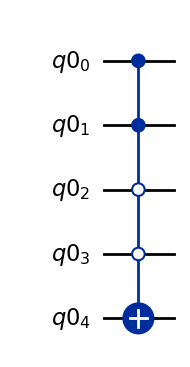

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import SwapGate, XGate

qr = QuantumRegister(5)

qc = QuantumCircuit(qr)

gateMCX = XGate().control(4,ctrl_state= 3) # puerta X 4-veces controlada
gateMCSWAP = SwapGate().control(3,ctrl_state= 4) # puerta SWAP 3 veces controlada


qc.append(gateMCX,[0,1,2,3,4])    
#qc.append(gateMCSWAP,[0,1,2,3,4])    


qc.draw('mpl')

En el convenio de qiskit, efectivamente, este operador es el que se corresponde con 

$$
MCX = X\otimes \ket{0011}  \bra{0011} + X\otimes (I-\ket{0011}\bra{0011})
$$

### Circuito entrelazador para la Base de Bell


El circuito que *prepara* la <i>base de Bell</i> $~\{\ket{B_{xy}} \equiv \ket{xy}_B \}~$ a partir de la <i>base computacional</i>  $\{\ket{xy}\}$ 



::::{figure} images/Bell_basis.png
:width: 200px
:align: center

::::



Concretamente 


$$
\begin{array}{rcl}
\ket{00} ~~~\stackrel{I\otimes H}{\longrightarrow}~~~ \frac{1}{\sqrt{2}}\ket{0}(\ket{0}+\ket{1})  &~~~\stackrel{\rm CNOT(0,1)}{\longrightarrow}& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) ~~=~~ \ket{00}_B \equiv \ket{\Phi^+}\\
\ket{01} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{0}(\ket{0} - \ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) ~~=~~ \ket{01}_B \equiv \ket{\Phi^-} \\
\ket{10} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{1}(\ket{0}+\ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{10} + \ket{01} \big) ~~=~~ \ket{10}_B \equiv \ket{\Psi^+}\\
\ket{11} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{1}(\ket{0}-\ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{01} \big) ~~=~~ \ket{11}_B \equiv \ket{\Psi^-}
\end{array}
$$

In [3]:
from qiskit import Aer, QuantumCircuit, execute
' create the circuit '
qc = QuantumCircuit(2,0)    
#qc.x(0)
#qc.x(1)

qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))


' execute in mode statevector_simulator '
S_simulator = Aer.get_backend('statevector_simulator')
Bell_state = execute(qc,S_simulator).result().get_statevector(decimals=5)


from qiskit.quantum_info import Statevector
Statevector(Bell_state).draw('latex')

ImportError: cannot import name 'Aer' from 'qiskit' (/Users/javier/opt/anaconda3/envs/TalentQ2/lib/python3.11/site-packages/qiskit/__init__.py)

In [4]:
' the Bell state cannot be drawn on Bloch spheres'
Statevector(Bell_state).draw('Bloch')

NameError: name 'Statevector' is not defined

## Teorema de no-clonación

El *Teorema de No Clonación* es uno de los resultados más sencillos y a la vez más importantes del formalismo de la Mecánica Cuántica. 

De hecho su formalización completa es bastante reciente, 1982, debida a [Wootters, Zurek](https://en.wikipedia.org/wiki/No-cloning_theorem#cite_note-wootterszurek-2) and [Dieks](https://en.wikipedia.org/wiki/No-cloning_theorem#cite_note-dieks-3). 

::::::{card} 
<b>Teorema</b>: </i>de  no-clonación</i> 

^^^
    
    
No existe un operador unitario $U$  que, para un estado arbitrario $|\psi\rangle$, realice la siguiente operación
  
    
$$
U ( \ket{\psi}\otimes \ket{0}) = \ket{\psi}\otimes \ket{\psi}
$$

::::::

*Demostración:*

Supondremos que $U$ existe y llegaremos a una contradicción. 
Tratemos de clonar el estado $\alpha\ket{\psi}+\beta\ket{\phi}$. Esto implica evaluar



$$
U (\alpha\ket{\psi}+\beta\ket{\phi})\otimes \ket{0} = 
(\alpha\ket{\psi}+\beta\ket{\phi})\otimes (\alpha\ket{\psi}+\beta\ket{\phi})
$$


Sin embargo, la linealidad de $U$ nos permite seguir otro camino



\begin{eqnarray*}
U(\alpha|\psi\rangle+\beta|\phi\rangle) \otimes|0\rangle &=& \alpha U|\psi\rangle \otimes|0\rangle+\beta U|\phi\rangle \otimes|0\rangle  \\ \rule{0mm}{12mm}
&=&\alpha|\psi\rangle \otimes|\psi\rangle+\beta|\phi\rangle \otimes|\phi\rangle . \rule{0mm}{6mm}
\end{eqnarray*}


Los dos resultados son diferentes y el teorema queda demostrado.


::::::{admonition} Notar
:class: note

  

- El teorema de no clonación pone  de manifiesto la <i> tensión </i> que hay entre $linealidad$ y $tensorialidad$, dos propiedades fundamentales de la Mecánica Cuántica.


- Es muy importante recalcar que la validez de este teorema sólo aplica a estados <i> genéricos </i>. 

- Si por ejemplo nos restringimos a estados de la base $\ket{0}$ y $\ket{1}$, entonces la mera puerta CNOT actúa como lo haría un operador de clonación.
    
$$
\cg{X}\ket{00}\to \ket{00}~~~~~,~~~~~~ \cg{X}\ket{10}\to \ket{11}
$$
::::::

